# I.Introduction

### I.1. Name: Nurvita Aisah

### I.2. Batch: FTDS_7

### I.3. Method: Edge Detection using Gradient based

# II. Libraries 
II.1. Install Pillow

In [1]:
pip install pillow

You should consider upgrading via the 'C:\Users\Asus\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


II.2 Used Libraries

In [2]:
from PIL import Image
import numpy as np
from numpy import asarray
import matplotlib.pyplot as plt 
import copy

# III. Data Loading
III.1. Image Loading

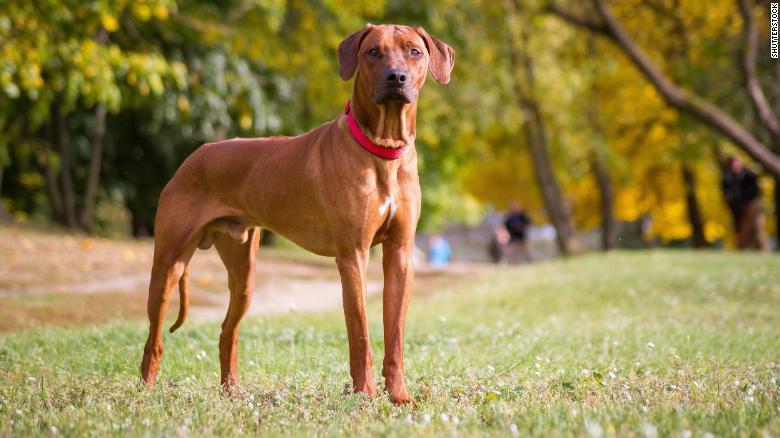

In [3]:
image = Image.open(r"201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg")
image

III.2. Transforming the Image into Array

In [4]:
numpydata = asarray(image)
print(numpydata)

[[[ 86  93  39]
  [ 86  94  37]
  [ 87  90  35]
  ...
  [ 48  41  15]
  [ 46  39  11]
  [ 59  52  23]]

 [[ 77  84  30]
  [ 77  84  30]
  [ 78  83  27]
  ...
  [ 46  38  15]
  [ 64  57  29]
  [ 37  30   1]]

 [[ 64  73  20]
  [ 66  73  19]
  [ 68  73  17]
  ...
  [ 56  48  27]
  [ 46  36  11]
  [ 70  60  33]]

 ...

 [[165 150 107]
  [159 144 101]
  [151 134  91]
  ...
  [150 138  86]
  [149 137  85]
  [145 134  80]]

 [[164 149 108]
  [157 142 101]
  [149 131  91]
  ...
  [155 143  93]
  [153 141  91]
  [148 136  84]]

 [[164 149 108]
  [157 142 101]
  [148 130  90]
  ...
  [160 148 100]
  [157 145  95]
  [150 138  88]]]


III.3. Image Data Exploration

In [5]:
print(image.format)
print(image.size)
print(image.mode)
print(type(numpydata))
print(numpydata.shape)

JPEG
(780, 438)
RGB
<class 'numpy.ndarray'>
(438, 780, 3)


III.4. Checking EXIF Data Embedded in the Image

In [6]:
image._getexif()

{296: 2,
 34665: 164,
 305: 'Adobe Photoshop 2020 Macintosh',
 306: '2020-10-30T13:42:10-04:00',
 282: 300.0,
 283: 300.0,
 36864: b'0220',
 40962: 5184,
 40963: 3456}

# IV. Data Preprocessing
IV.1. Copying the Image

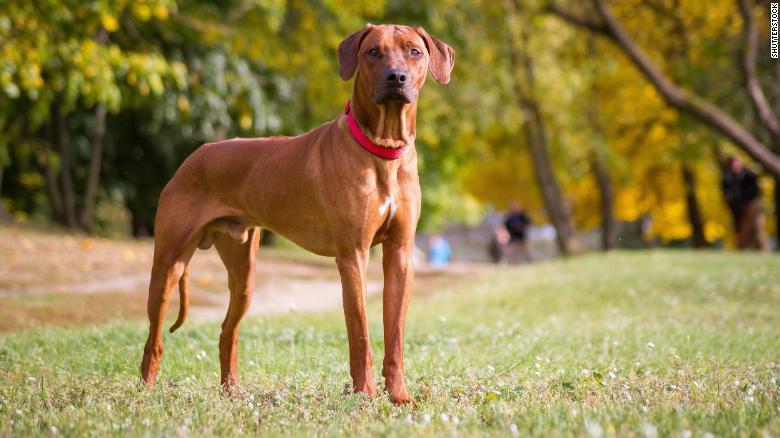

In [7]:
new_image = copy.copy(image)
new_image

IV.2. Converting the Image to Grayscale

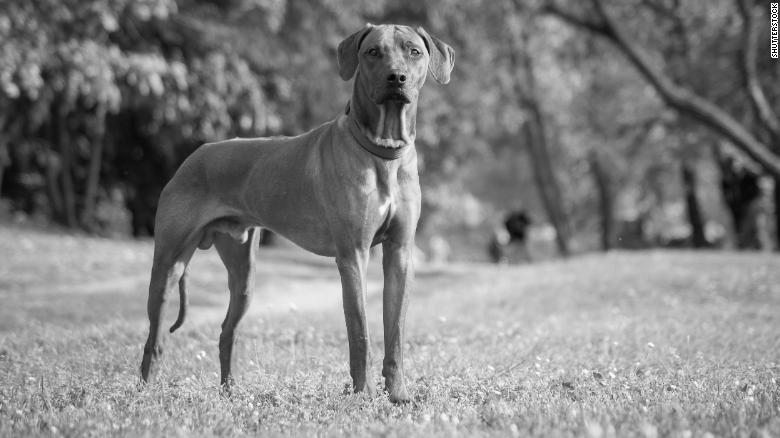

In [8]:
grey = new_image.convert("L")
grey

IV.3. Checking Grayscale Array

In [9]:
grey_array = asarray(grey)
print(grey_array)

[[ 85  85  83 ...  40  38  51]
 [ 76  76  75 ...  38  56  29]
 [ 64  65  65 ...  48  36  60]
 ...
 [150 144 134 ... 136 135 131]
 [149 142 132 ... 141 139 134]
 [149 142 131 ... 146 143 136]]


IV.4. Checking Grayscale Image Shape

In [10]:
grey_array.shape

(438, 780)

# V. Image Processing

V.1. Matrix Identity Multiplication

Since the image has 438 rows, the grayscale image will be multipled by 438.

In [11]:
mat = 11*np.identity(438)
mat

array([[11.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0., 11.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0., 11., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 11.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 11.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0., 11.]])

Displaying the Image Result of Matrix Identity Multiplication

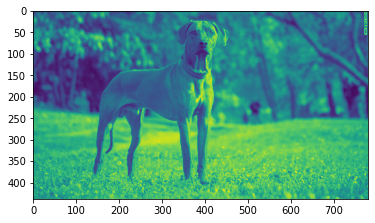

In [12]:
img_id11 = mat@grey_array
plt.imshow(img_id11)

V.2. Matrix Random Multiplication

Since the image has 438 rows and 780 columns, the image will be multipled by 780 rows and 438 columns.

In [13]:
rand = np.random.rand(780, 438)
rand

array([[0.94442109, 0.42709252, 0.99089731, ..., 0.8253068 , 0.4651146 ,
        0.46749559],
       [0.15478499, 0.20400974, 0.02831525, ..., 0.73238919, 0.20732532,
        0.15605533],
       [0.9642068 , 0.37420548, 0.60910135, ..., 0.52485843, 0.46442435,
        0.07252495],
       ...,
       [0.54044945, 0.20223003, 0.9578009 , ..., 0.82972922, 0.13207508,
        0.62392287],
       [0.27330993, 0.60617741, 0.52962724, ..., 0.25108819, 0.01622294,
        0.97407052],
       [0.68412243, 0.94110658, 0.63996457, ..., 0.43993712, 0.5993633 ,
        0.17780826]])

Displaying the Image Result of Matrix Random Multiplication

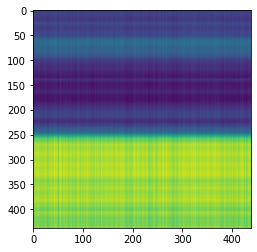

In [14]:
img_rand = np.dot(grey_array, rand)
plt.imshow(img_rand)

V.3. Gradient or Partial Derivative of the Grayscale Image

Calculate the gradient vector using formula:  $\frac{\partial I}{\partial x}$ and $\frac{\partial I}{\partial y}$

In [15]:
fx, fy = np.gradient(grey_array)

V.4. Checking Derivative Array at X-axis

In [16]:
fx

array([[ -9. ,  -9. ,  -8. , ...,  -2. ,  18. , -22. ],
       [-10.5, -10. ,  -9. , ...,   4. ,  -1. ,   4.5],
       [ -9. ,  -9. ,  -8. , ..., 107.5, -14. ,  20. ],
       ...,
       [ -0.5,  -2. ,  -2.5, ...,   2. ,   1.5,   1. ],
       [ -0.5,  -1. ,  -1.5, ...,   5. ,   4. ,   2.5],
       [  0. ,   0. ,  -1. , ...,   5. ,   4. ,   2. ]])

V.5. Checking Derivative Array at Y-axis

In [17]:
fy

array([[  0. ,  -1. ,  -2.5, ...,  -1.5,   5.5,  13. ],
       [  0. ,  -0.5,  -1. , ...,   6. ,  -4.5, -27. ],
       [  1. ,   0.5,   0.5, ...,  -3. ,   6. ,  24. ],
       ...,
       [ -6. ,  -8. ,  -9.5, ...,   1. ,  -2.5,  -4. ],
       [ -7. ,  -8.5,  -8.5, ...,   0.5,  -3.5,  -5. ],
       [ -7. ,  -9. ,  -9. , ...,  -0.5,  -5. ,  -7. ]])

V.6. Magnitute Gradient of the Image

Calculate magnitude gradient of each pixel using formula: $mag=\sqrt{(\frac{\partial I}{\partial x})^2 + (\frac{\partial I}{\partial y})^2}$

In [18]:
mag_grad = np.sqrt(fx**2 + fy**2)
mag_grad

array([[  9.        ,   9.05538514,   8.38152731, ...,   2.5       ,
         18.82153022,  25.55386468],
       [ 10.5       ,  10.0124922 ,   9.05538514, ...,   7.21110255,
          4.60977223,  27.37243139],
       [  9.05538514,   9.01387819,   8.01560977, ..., 107.54185232,
         15.23154621,  31.2409987 ],
       ...,
       [  6.02079729,   8.24621125,   9.82344135, ...,   2.23606798,
          2.91547595,   4.12310563],
       [  7.01783442,   8.55862138,   8.63133825, ...,   5.02493781,
          5.31507291,   5.59016994],
       [  7.        ,   9.        ,   9.05538514, ...,   5.02493781,
          6.40312424,   7.28010989]])

V.7. Comparing Threshold Values

Text(0.5, 1.0, 'Threshold 45')

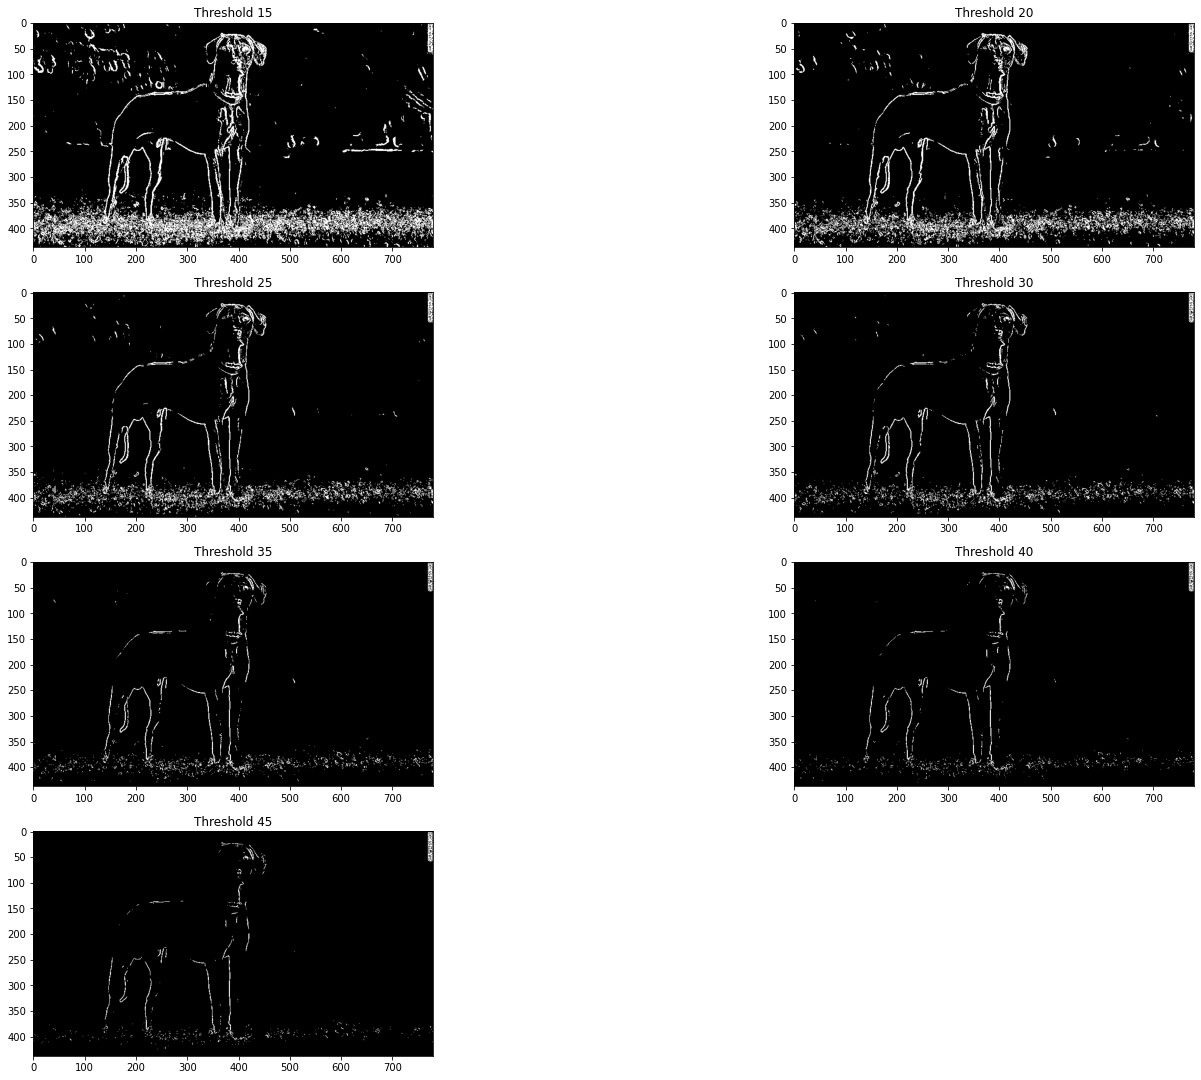

In [19]:
plot_aggagement = plt.figure(figsize=(25,19))
row = 4
column = 2

plot_aggagement.add_subplot(row, column, 1)
plt.imshow(mag_grad>15, cmap='gray')
plt.title("Threshold 15")

plot_aggagement.add_subplot(row, column, 2)
plt.imshow(mag_grad>20, cmap='gray')
plt.title("Threshold 20")

plot_aggagement.add_subplot(row, column, 3)
plt.imshow(mag_grad>25, cmap='gray')
plt.title("Threshold 25")

plot_aggagement.add_subplot(row, column, 4)
plt.imshow(mag_grad>30, cmap='gray')
plt.title("Threshold 30")

plot_aggagement.add_subplot(row, column, 5)
plt.imshow(mag_grad>35, cmap='gray')
plt.title("Threshold 35")

plot_aggagement.add_subplot(row, column, 6)
plt.imshow(mag_grad>40, cmap='gray')
plt.title("Threshold 40")

plot_aggagement.add_subplot(row, column, 7)
plt.imshow(mag_grad>45, cmap='gray')
plt.title("Threshold 45")

# VI. Conclusion

1. Based on the image data exploration, the image has data specifications as follows. The image format is JPEG, the image mode is RGB, the image consists of arrays, and it has 438 rows and 780 columns. 
2. The result of matrix identity multiplication with grayscale image is color alteration which changes grayscale image into greenish-blue image. 
3. The result of matrix random multiplication with grayscale image makes the dog figure hindered and distorted into abstract colors consisting of blue and yellowish-green colors.
4. Based on seven attempts of comparing threshold values, it could be drawn several conclusions as follows: 
- The increment of magnitude gradient will create less edges and alleviate image noises. 
- The increment of magnitude gradient not only removes the background features such as grass edge, but it also dismisses the edge of the main figure (dog figure).
- The increment of magnitude gradient method is unable to solely delineate the edge of the main figure (dog figure) and remove background noises, to solely delineate the main figure, perhaps we should apply other method or conditioning the main figure while conducting the image processing. 
- After comparing seven threshold values, based on my own perspective, the best edge detection is the image which has the threshold value of 25 due to several reasons. First and the foremost, the threshold-25 image has more distinct edge delineation at the dog's upper neck rather than the threshold-30 image. Secondly, the images which have lower threshold value than the threshold-25 image, they have more noises at the main figure and on the background. Lastly, the images which have higher threshold value than the threshold-25 image, the edge delineation of the main figure are poorly performed. 
